In [67]:
import json
import urllib.request as ur

from tqdm.notebook import tqdm as tq

import xarray as xr
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from scipy.stats import f_oneway

from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display, HTML

In [2]:
A = xr.open_dataarray("data.nc")

In [64]:
A

<xarray.DataArray (function: 5, country: 185, date: 96)>
array([[[ 0.000000e+00,  0.000000e+00, ...,  1.463000e+03,  1.531000e+03],
        [ 0.000000e+00,  0.000000e+00, ...,  7.120000e+02,  7.260000e+02],
        ...,
        [ 0.000000e+00,  0.000000e+00, ...,  8.400000e+01,  8.800000e+01],
        [ 0.000000e+00,  0.000000e+00, ...,  3.100000e+01,  3.100000e+01]],

       [[-8.043849e+00, -8.031229e+00, ...,  1.419194e+03,  1.484488e+03],
        [-8.235539e+00, -8.205211e+00, ...,  6.700649e+02,  6.803428e+02],
        ...,
        [-1.724947e+00, -1.716752e+00, ...,  7.907836e+01,  8.121477e+01],
        [-2.012213e-01, -2.007993e-01, ...,  3.074956e+01,  3.162630e+01]],

       ...,

       [[-1.475189e+00, -1.475189e+00, ...,  1.425457e+03,  1.500950e+03],
        [-1.733686e+00, -1.733686e+00, ...,  6.809832e+02,  6.954847e+02],
        ...,
        [-6.641032e-01, -6.641031e-01, ...,  7.794993e+01,  8.005098e+01],
        [-6.975899e-02, -6.975899e-02, ...,  3.110545e+01,  3.226219e+01]],

       [[-1.475024e+00, -1.475024e+00, ...,  1.425456e+03,  1.500948e+03],
        [-1.733632e+00, -1.733632e+00, ...,  6.809833e+02,  6.954848e+02],
        ...,
        [ 1.679206e-01,  1.679206e-01, ...,  8.506998e+01,  8.850722e+01],
        [ 1.901137e-02,  1.901137e-02, ...,  3.073411e+01,  3.152195e+01]]])
Coordinates:
  * country   (country) object 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'
  * date      (date) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-04-26
  * function  (function) object 'measured' 'Logit' 'DobLogit' 'Gomp' 'DobGomp'

In [9]:
def prepare_null_arr(x, y, z):
    null_arr = [
        [
            [
                None for _ in range(len(z))
            ] for _ in range(len(y))
        ] for _ in range(len(x))
    ]
    return null_arr

In [10]:
def get_residuals(arr):
    F = arr["function"].values[1:]
    C = arr["country"].values
    D = arr["date"].values

    _E = prepare_null_arr(F, C, D)

    for _f, f in enumerate(F):
        for _c, c in enumerate(C):    
            V = arr.sel(country=c, function="measured").values
            _e = V - arr.sel(country=c, function=f).values
            _E[_f][_c] = _e

    R = xr.DataArray(_E, coords=[F, C, D], dims=["function", "country", "date"])
    R.to_netcdf("residuals.nc")
    return R

In [11]:
R = get_residuals(A)

In [12]:
R

<xarray.DataArray (function: 4, country: 185, date: 96)>
array([[[ 8.04384905e+00,  8.03122876e+00,  8.01713897e+00, ...,
         -1.73174391e+00,  4.38058695e+01,  4.65123772e+01],
        [ 8.23553941e+00,  8.20521100e+00,  8.17159815e+00, ...,
          1.89744487e+01,  4.19351038e+01,  4.56571941e+01],
        [ 2.25780205e+01,  2.25563482e+01,  2.25317771e+01, ...,
          5.04228717e+01,  1.18833443e+02,  1.89392034e+02],
        ...,
        [ 1.54888872e-19,  1.54888872e-19,  1.54888872e-19, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.72494749e+00,  1.71675246e+00,  1.70783977e+00, ...,
          7.12405045e+00,  4.92164191e+00,  6.78523263e+00],
        [ 2.01221302e-01,  2.00799285e-01,  2.00327951e-01, ...,
         -8.25729131e-01,  2.50441680e-01, -6.26300201e-01]],

       [[ 8.04396823e+00,  8.03134776e+00,  8.01725776e+00, ...,
         -1.73176212e+00,  4.38057380e+01,  4.65121098e+01],
        [ 8.23552668e+00,  8.20519822e+00,  8.17158530e+00, ...,
          1.89743511e+01,  4.19349919e+01,  4.56570682e+01],
        [-3.45622312e+00, -3.45629654e+00, -3.45638723e+00, ...,
         -2.34728785e+01,  1.74884206e+00,  2.98135856e+01],
        ...,
        [-8.88312906e-19, -8.88312906e-19, -8.88312906e-19, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.61796394e-02, -6.61796394e-02, -6.61796394e-02, ...,
          2.17696266e+00, -1.03852990e+00,  2.83181202e-01],
        [ 2.74855405e-01,  2.74259543e-01,  2.73596757e-01, ...,
         -2.12051872e-01,  1.18736965e+00,  6.22084175e-01]],

       [[ 1.47518936e+00,  1.47518936e+00,  1.47518936e+00, ...,
         -4.87066209e-01,  3.75428494e+01,  3.00504802e+01],
        [ 1.73368585e+00,  1.73368585e+00,  1.73368585e+00, ...,
          1.19084146e+01,  3.10168192e+01,  3.05153273e+01],
        [ 3.81727467e-01,  3.81727467e-01,  3.81727467e-01, ...,
          2.45018101e+01,  7.18518837e+01,  1.18918415e+02],
        ...,
        [-3.09443511e-19, -3.09443511e-19, -3.09443511e-19, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.64103150e-01,  6.64103150e-01,  6.64103150e-01, ...,
          8.18039177e+00,  6.05006777e+00,  7.94901711e+00],
        [ 6.97589882e-02,  6.97589882e-02,  6.97589882e-02, ...,
         -9.46851973e-01, -1.05448168e-01, -1.26219391e+00]],

       [[ 1.47502403e+00,  1.47502403e+00,  1.47502403e+00, ...,
         -4.86489773e-01,  3.75437898e+01,  3.00518406e+01],
        [ 1.73363208e+00,  1.73363208e+00,  1.73363208e+00, ...,
          1.19083121e+01,  3.10167107e+01,  3.05152134e+01],
        [-7.66936369e+00, -7.66936369e+00, -7.66936369e+00, ...,
         -2.14625233e+01,  2.89507151e+00,  2.89194607e+01],
        ...,
        [ 3.74862930e-18,  3.74862930e-18,  3.74862930e-18, ...,
          9.30366895e-14,  9.30366895e-14,  9.30366895e-14],
        [-1.67920588e-01, -1.67920588e-01, -1.67920588e-01, ...,
          2.61424714e+00, -1.06998034e+00, -5.07219038e-01],
        [-1.90113687e-02, -1.90113687e-02, -1.90113687e-02, ...,
         -8.95813879e-01,  2.65893950e-01, -5.21953147e-01]]])
Coordinates:
  * function  (function) object 'Logit' 'DobLogit' 'Gomp' 'DobGomp'
  * country   (country) object 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'
  * date      (date) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-04-26

In [20]:
def get_residual_sum_of_squares(residuals_arr):
    F = residuals_arr["function"].values
    C = residuals_arr["country"].values
    
    _RSS = prepare_null_arr(F, C, [])
    
    for _f, f in enumerate(F):
        for _c, c in enumerate(C):
            residuals = residuals_arr.sel(country=c, function=f).values
            _rss = np.sum(residuals ** 2)
            _RSS[_f][_c] = _rss
    
    RSS = xr.DataArray(_RSS, coords=[F, C], dims=["function", "country"])
    RSS.to_netcdf("rss.nc")
    return RSS

In [21]:
RSS = get_residual_sum_of_squares(R)

In [29]:
RSS

<xarray.DataArray (function: 4, country: 185)>
array([[3.26671949e+04, 2.34916108e+04, 3.82319073e+05, 1.92019039e+04,
        8.45044966e+01, 5.41295448e+01, 6.72426576e+05, 2.12609222e+05,
        3.89081354e+05, 4.84554115e+06, 2.19470882e+04, 4.13528635e+02,
        2.88992553e+05, 3.95709951e+04, 2.14406746e+02, 2.02244255e+06,
        3.61199506e+07, 4.29818096e+01, 6.40865414e+02, 1.48802924e+01,
        1.64085600e+04, 3.19511344e+04, 7.70520022e+01, 4.45386392e+07,
        1.25749218e+03, 1.34230957e+05, 1.37320627e+04, 1.01642259e+03,
        5.00342053e+01, 1.91944744e+03, 1.28032591e+03, 3.79532448e+05,
        4.08522131e+07, 5.60182364e+01, 1.80883986e+02, 3.17463062e+06,
        3.20496498e+08, 7.49043058e+05, 3.46860547e+03, 8.11717036e+03,
        1.20738793e+04, 3.26181481e+04, 1.06002892e+05, 1.06687089e+04,
        4.80364588e+03, 9.92112362e+05, 1.37474969e+06, 1.79086754e+04,
        2.55705861e+04, 6.44908475e+01, 5.62336466e+05, 1.15060925e+08,
        8.04627064e+04, 1.58888043e+03, 1.25020329e+04, 9.57884765e+01,
        6.61954829e+04, 6.02260817e+02, 1.86688383e+02, 5.20459222e+01,
        3.42193912e+05, 1.13627101e+09, 1.61039683e+03, 4.33181759e+01,
        3.48978077e+03, 4.02894696e+08, 9.87636969e+04, 1.16188753e+05,
        6.94125885e+01, 3.45595674e+03, 1.45940751e+04, 2.38156274e+02,
        6.81865208e+02, 3.66702910e+02, 1.85109542e+01, 3.49598128e+04,
        8.86890214e+04, 1.90712638e+04, 4.46360545e+06, 3.80161441e+05,
        2.89174578e+10, 5.32305718e+04, 4.46480316e+06, 9.39721657e+06,
        1.21906666e+09, 5.71031870e+03, 4.14273734e+06, 1.31869306e+04,
        9.84328756e+04, 9.13396176e+03, 2.25135937e+07, 3.76451871e+04,
        1.85858809e+05, 6.31266684e+03, 5.59524326e+01, 2.64907984e+04,
        1.62952595e+04, 7.12083886e+02, 3.93676943e+02, 7.62821158e+02,
        1.19887233e+05, 5.30218384e+05, 1.14553636e+01, 6.04084484e+02,
        2.14757018e+02, 6.23378411e+05, 4.30568380e+03, 1.51152533e+03,
        1.06167636e+04, 7.60986743e+00, 4.17358916e+03, 2.78464323e+06,
        2.11134772e+05, 2.79890652e+02, 3.87506093e+02, 3.22300963e+03,
        2.10840049e+05, 4.29032983e+02, 1.92341337e+01, 2.68054348e+02,
        2.43332648e+07, 2.29258811e+04, 1.79807258e+01, 5.87501698e+03,
        6.73617438e+04, 2.89582403e+04, 9.93687186e+05, 2.33816555e+04,
        3.66035472e+06, 5.67529908e+05, 3.17590270e+01, 2.05094149e+03,
        1.65190648e+07, 2.20382424e+06, 1.63385838e+06, 1.39395633e+07,
        8.03056534e+05, 1.52642795e+06, 4.62120154e+06, 3.76454013e+03,
        4.00675367e+01, 5.03747841e+01, 3.23334759e+01, 2.75527083e+04,
        1.44433249e-16, 2.36222631e+06, 5.13138708e+04, 1.12487161e+06,
        2.96344472e+01, 1.85976159e+02, 3.97077492e+06, 4.98163169e+04,
        4.59728228e+04, 4.12039017e+03, 2.17430736e+06, 5.80117448e+00,
        1.89403068e+09, 3.76041462e+04, 1.80868637e+03, 9.77275353e+00,
        3.03615860e+06, 1.98708218e+07, 1.80068194e+02, 1.05638509e+04,
        6.92123323e+03, 1.85851716e+05, 4.75684717e+01, 7.66151250e+02,
        1.63408372e+03, 3.99937207e+04, 7.57958814e+07, 1.72574542e+10,
        1.50301217e+03, 3.60035631e+05, 1.14298002e+06, 1.82785308e+08,
        2.87389701e+04, 4.34907811e+04, 2.29840633e+04, 1.84650398e+03,
        4.50023748e+04, 1.33700866e+01, 6.07795595e-17, 2.43071013e+03,
        8.23969400e+01],
       [3.26671949e+04, 2.34916108e+04, 4.37642376e+04, 2.78155530e+03,
        7.82567491e+01, 5.08438545e+01, 8.38526065e+04, 1.52310683e+04,
        7.09176010e+04, 4.35131566e+05, 6.87476829e+03, 7.96792692e+01,
        2.88992553e+05, 3.04009789e+04, 2.02600463e+02, 7.29063586e+05,
        3.58751195e+06, 2.03420372e+01, 2.03200671e+02, 1.12782974e+01,
        4.81235716e+03, 8.07735898e+03, 4.75629598e+01, 4.45386392e+07,
        2.18678832e+02, 1.19130565e+04, 2.05969190e+03, 6.63219564e+02,
                   nan,            nan, 5.24939351e+02, 4.24119107e+04,
        3.35095891e+06,            nan, 

In [51]:
def get_total_sum_of_squares(arr):
    C = arr["country"].values
    
    _TSS = [None for _ in range(len(C))]
    
    for _c, c in enumerate(C):
        y = arr.sel(country=c, function="measured").values
        _tss = np.sum((y - np.mean(y)) ** 2)
        _TSS[_c] = _tss

    TSS = xr.DataArray(_TSS, coords=[C], dims=["country"])
    TSS.to_netcdf("tss.nc")
    return TSS

In [52]:
TSS = get_total_sum_of_squares(A)

In [83]:
TSS

<xarray.DataArray (country: 185)>
array([1.42531037e+07, 4.61073549e+06, 9.30084115e+07, 7.28905849e+06,
       7.31423958e+03, 7.79962500e+03, 1.16036532e+08, 2.46282342e+07,
       7.05677511e+08, 3.45776515e+09, 2.60181118e+07, 4.99605000e+04,
       4.57984445e+07, 1.29002442e+08, 8.52817396e+04, 5.16875937e+08,
       1.97282375e+10, 4.03140625e+03, 2.80506250e+04, 5.10489583e+02,
       4.42308891e+06, 2.18110040e+07, 4.41298958e+03, 2.19092285e+10,
       3.59839490e+05, 1.22153982e+07, 4.63822383e+06, 1.48923625e+05,
       7.61906250e+02, 5.50556250e+04, 2.75603958e+05, 1.79306470e+07,
       1.73375022e+10, 2.35783333e+03, 1.29876562e+04, 1.37813681e+09,
       7.12938070e+10, 2.02378123e+08, 2.88545625e+05, 1.41325733e+06,
       6.26433224e+06, 9.28523874e+06, 4.86417625e+07, 1.40707300e+07,
       7.82327549e+06, 6.60119622e+08, 7.83255158e+08, 8.00024050e+06,
       7.77184916e+06, 4.53273958e+03, 2.80625219e+08, 2.19705527e+09,
       1.36181434e+08, 5.74451990e+05, 2.03424625e+05, 2.16340000e+04,
       3.24348816e+07, 1.17786562e+04, 1.37137625e+05, 4.44148958e+03,
       1.91164016e+08, 2.83082547e+11, 2.03981990e+05, 1.17423958e+03,
       1.84835224e+06, 3.02132417e+11, 1.21377870e+07, 7.83133502e+07,
       3.55783333e+03, 1.16758374e+06, 5.58789696e+06, 3.03264896e+04,
       5.03199062e+04, 3.87760000e+04, 1.15948958e+03, 3.31622800e+06,
       4.93147058e+07, 4.92320124e+07, 4.40693878e+09, 5.60496542e+08,
       9.35437653e+10, 3.34867793e+07, 2.88596422e+09, 2.57901451e+09,
       4.57655643e+11, 5.37626490e+05, 1.33342117e+09, 2.78174791e+06,
       4.43096015e+07, 1.03930383e+06, 1.96465043e+09, 2.73327966e+06,
       5.14407620e+07, 3.84219449e+06, 5.32490625e+03, 7.77755299e+06,
       6.93774999e+06, 1.01589958e+05, 3.24601562e+04, 1.16711990e+05,
       2.25855598e+07, 1.95877905e+08, 1.51195833e+03, 1.99368958e+05,
       6.58898958e+03, 4.03303441e+08, 1.13085958e+05, 7.81736000e+05,
       2.45874296e+06, 8.27833333e+02, 1.63333249e+06, 1.00056335e+09,
       8.28234320e+07, 1.35509833e+05, 1.27419583e+04, 1.36044983e+06,
       1.10538856e+08, 2.46759583e+04, 4.48448958e+03, 1.49273333e+04,
       1.41346850e+10, 3.06312984e+07, 1.38515625e+03, 5.29827800e+06,
       7.24247796e+06, 1.74091393e+07, 7.65703155e+08, 2.32930526e+07,
       1.04183897e+09, 2.55822512e+08, 5.23489583e+02, 5.04986500e+05,
       3.74012045e+09, 5.25076393e+08, 1.11343760e+09, 5.65202118e+09,
       4.93600094e+08, 1.00484450e+09, 3.05245007e+10, 3.27028406e+05,
       3.05395833e+03, 3.87250000e+03, 2.25890625e+03, 2.69741199e+06,
       2.62500000e+02, 1.47423156e+09, 2.38265066e+06, 4.37432847e+08,
       2.20933333e+03, 3.32685000e+04, 8.57541145e+08, 1.62246652e+07,
       2.57119607e+07, 7.54391333e+05, 1.45267003e+08, 2.67958333e+02,
       5.56243298e+11, 1.35795774e+06, 1.92313833e+05, 1.94050000e+03,
       2.74766953e+09, 1.15217586e+10, 1.82276562e+04, 2.53519224e+06,
       5.56822500e+05, 1.14602921e+08, 4.46815625e+03, 1.03335156e+05,
       2.27271333e+05, 1.04535893e+07, 9.74344006e+10, 7.72873162e+12,
       6.22916250e+04, 4.21914758e+08, 6.69030414e+08, 1.90930669e+11,
       4.30586874e+06, 2.91877885e+07, 9.07418906e+05, 1.09203183e+06,
       2.11256462e+06, 5.06958333e+02, 1.39895833e+01, 5.86649583e+04,
       7.92348958e+03])
Coordinates:
  * country  (country) object 'Afghanistan' 'Albania' ... 'Zambia' 'Zimbabwe'

In [56]:
def get_r2(rss, tss):
    F = rss["function"].values
    C = rss["country"].values
    
    _R2 = prepare_null_arr(F, C, [])
    
    for _f, f in enumerate(F):
        for _c, c in enumerate(C):
            _r2 = 1 - (rss.sel(function=f, country=c).values / tss.sel(country=c).values)
            _R2[_f][_c] = _r2
            
    R2 = xr.DataArray(_R2, coords=[F, C], dims=["function", "country"])
    R2.to_netcdf("r2.nc")
    return R2

In [57]:
R2 = get_r2(RSS, TSS)

In [69]:
display(HTML(R2.to_dataframe(name="r2").to_html(notebook=True,)))

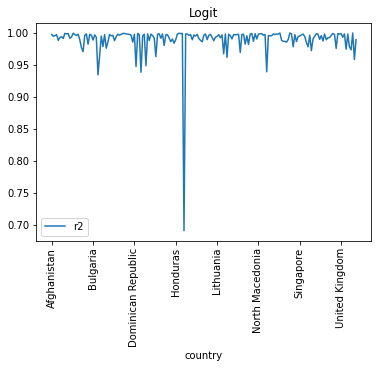

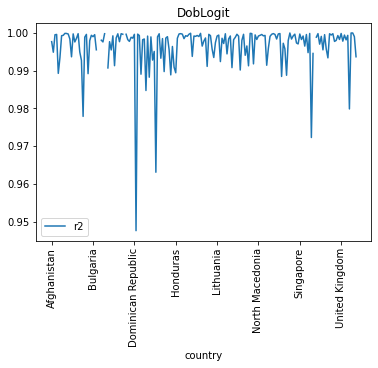

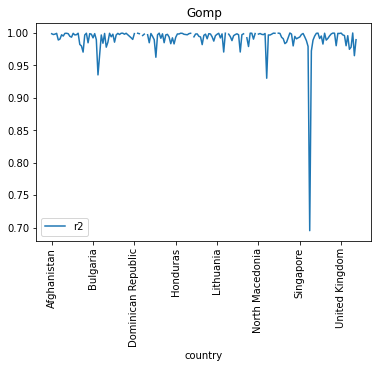

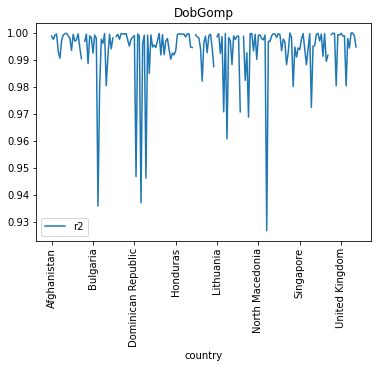

In [80]:
R2.sel(function="Logit").to_dataframe(name="r2").plot(title="Logit", rot=90)
R2.sel(function="DobLogit").to_dataframe(name="r2").plot(title="DobLogit", rot=90)
R2.sel(function="Gomp").to_dataframe(name="r2").plot(title="Gomp", rot=90)
R2.sel(function="DobGomp").to_dataframe(name="r2").plot(title="DobGomp", rot=90)

In [ ]:
def check_errors():

    mLoc = mdates.MonthLocator()
    dLoc = mdates.DayLocator()
    mFmt = mdates.DateFormatter("%b")
    
    nrows = int(np.ceil(len(C) / 3))
    
    fig, axs = plt.subplots(ncols=3, nrows=nrows, figsize=(15, 5 * nrows))
    
    for i, c in enumerate(tq(C)):    
        V = a.sel(country=c, function="measured").values
        E = {}
        for f in F:
            e = V - a.sel(country=c, function=f).values
            E.update({f: e})

        for f in F:
            axs.flat[i].plot(
                D, E[f],
                label=f
            )
            axs.flat[i].legend(loc="upper left")
            axs.flat[i].set_title(c)
            axs.flat[i].xaxis.set_major_locator(mLoc)
            axs.flat[i].xaxis.set_major_formatter(mFmt)
            axs.flat[i].xaxis.set_minor_locator(dLoc)

In [ ]:
check_errors()

In [ ]:
mLoc = mdates.MonthLocator()
dLoc = mdates.DayLocator()
mFmt = mdates.DateFormatter("%b")